In [3]:
# Hello Jupyter! Let's start our project
print( "Prashanthi's Churn Project Starting! 🚀")


Prashanthi's Churn Project Starting! 🚀


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import joblib


In [8]:
df = pd.read_csv(r"C:\Users\v prasanthi\Desktop\APJ\RESUMES\DATA ANALYST\projects\CUSTOMER_CHURN_PROJECT\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
# Basic info & missing values
print("Dataset Info:")
print(df.info())
print("\nMissing values per column:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-n

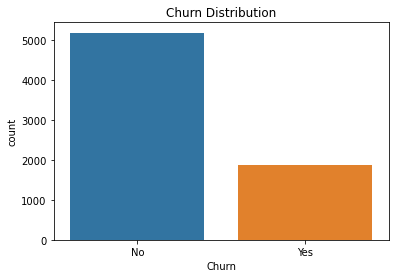

In [11]:
# Check churn distribution
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

In [12]:
# Percentage churn
print("\nChurn Percentage:")
print(df['Churn'].value_counts(normalize=True) * 100)


Churn Percentage:
No     73.463013
Yes    26.536987
Name: Churn, dtype: float64


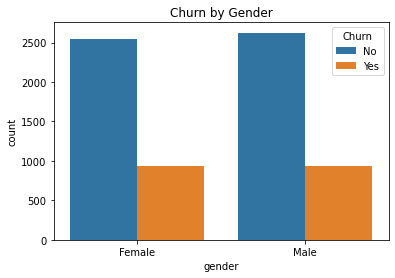

In [13]:
# Visualize churn vs gender
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Churn by Gender')
plt.show()

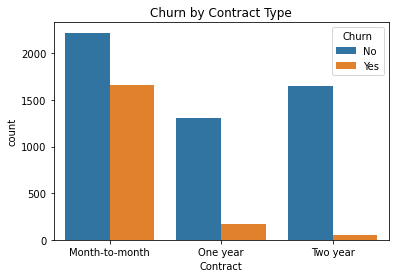

In [14]:
# Visualize churn vs Contract type
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.show()

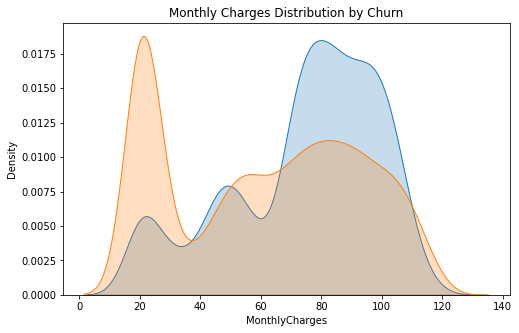

In [15]:
# Visualize Monthly Charges distribution by Churn
plt.figure(figsize=(8,5))
sns.kdeplot(df.loc[df['Churn']=='Yes','MonthlyCharges'], label='Churned', shade=True)
sns.kdeplot(df.loc[df['Churn']=='No','MonthlyCharges'], label='Stayed', shade=True)
plt.title('Monthly Charges Distribution by Churn')
plt.show()

In [16]:
# Check unique values of categorical columns
cat_cols = df.select_dtypes(include='object').columns
print("\nUnique values in categorical columns:")
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")


Unique values in categorical columns:
customerID: 7043 unique values
gender: 2 unique values
Partner: 2 unique values
Dependents: 2 unique values
PhoneService: 2 unique values
MultipleLines: 3 unique values
InternetService: 3 unique values
OnlineSecurity: 3 unique values
OnlineBackup: 3 unique values
DeviceProtection: 3 unique values
TechSupport: 3 unique values
StreamingTV: 3 unique values
StreamingMovies: 3 unique values
Contract: 3 unique values
PaperlessBilling: 2 unique values
PaymentMethod: 4 unique values
TotalCharges: 6531 unique values
Churn: 2 unique values


In [17]:
# Checking for outliers in numerical columns (TotalCharges, MonthlyCharges, tenure)
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [19]:
# Convert TotalCharges to numeric, force errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check how many missing now in TotalCharges
print("Missing in TotalCharges:", df['TotalCharges'].isnull().sum())

# Fill or drop missing values - here, let's fill with median
median_totalcharges = df['TotalCharges'].median()
df['TotalCharges'].fillna(median_totalcharges, inplace=True)


Missing in TotalCharges: 11


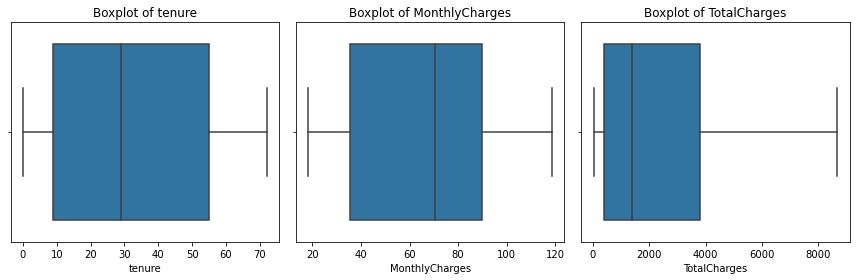

In [20]:
plt.figure(figsize=(12,4))
for i, col in enumerate(num_cols):
    plt.subplot(1,3,i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [23]:
# Drop customerID (not useful for prediction)
df.drop('customerID', axis=1, inplace=True)


In [24]:
# Check data types again
print(df.dtypes)


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [25]:
# Convert 'Churn' column to 1 (Yes) and 0 (No)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [26]:
# Find categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()

In [27]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [28]:
# Scale numerical columns
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

In [30]:
# Final check
print("\nFinal dataset shape:", df_encoded.shape)
df_encoded.head()


Final dataset shape: (7043, 31)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.277445,-1.160323,-0.994242,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,0.066327,-0.259629,-0.173244,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,-1.236724,-0.362660,-0.959674,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0.514251,-0.746535,-0.194766,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,-1.236724,0.197365,-0.940470,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Split data
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [33]:
# Train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [34]:
# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # for ROC

In [35]:
# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))


Accuracy: 0.8055358410220014
Precision: 0.6582278481012658
Recall: 0.5561497326203209
F1 Score: 0.6028985507246376
ROC AUC: 0.8419979849647369


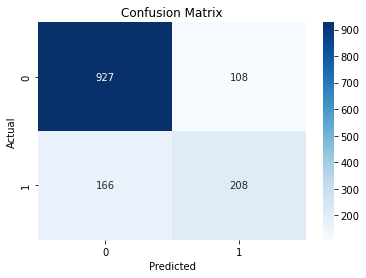

In [36]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

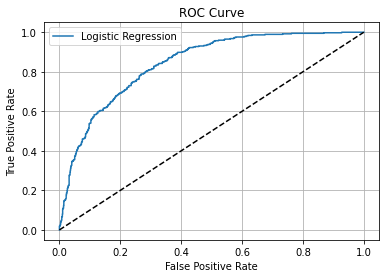

In [37]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

Random Forest Accuracy: 0.7877927608232789
Precision: 0.6262626262626263
Recall: 0.49732620320855614
F1 Score: 0.5543964232488823
ROC AUC: 0.8249670619235836


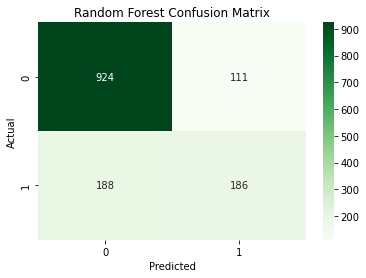

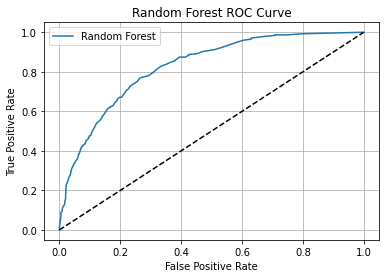

In [38]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
rf_pred = rf_model.predict(X_test)
rf_prob = rf_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Precision:", precision_score(y_test, rf_pred))
print("Recall:", recall_score(y_test, rf_pred))
print("F1 Score:", f1_score(y_test, rf_pred))
print("ROC AUC:", roc_auc_score(y_test, rf_prob))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_prob)
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [39]:
import joblib
joblib.dump(model, 'logistic_churn_model.pkl')


['logistic_churn_model.pkl']